In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("E:/Dataset/pizza.csv")
df.head()

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67


In [3]:
df.isnull().sum()

brand     0
id        0
mois      0
prot      0
fat       0
ash       0
sodium    0
carb      0
cal       0
dtype: int64

In [4]:
X = df.drop(labels=['brand','id'],axis=1)
Y = df.brand

labels = Y.unique().tolist()
classes = [labels.index(label) for label in Y]

# the important features that are impacting on deciding brand of pizzas

<AxesSubplot:>

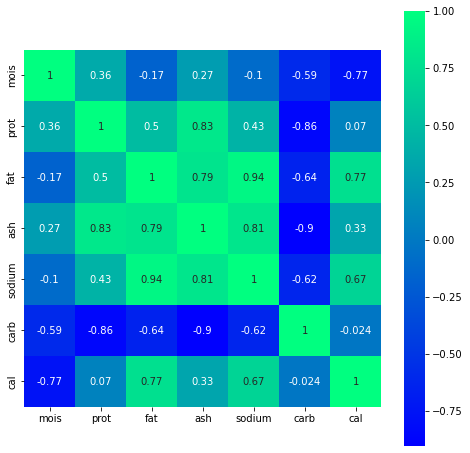

In [5]:
#Convert columns of X to N(0, 1) distributions
X_std = (X.values - np.mean(X.values, axis=0)) / np.std(X.values, axis=0)

#Find the covariance matrix
X_cov = np.cov(X_std, rowvar=False)

#Create a covariance-matrix dataframe to plot the heatmap
X_cov_df = pd.DataFrame(data=X_cov, columns=X.columns, index=X.columns)
plt.figure(figsize=(8,8))
sns.heatmap(X_cov_df, vmax=1, square=True, annot=True, cmap='winter')

In [ ]:
a.	Mois, prot, fat, ash, sodium, carbohydrate, calories
b.	Mois, fat, ash, sodium, carbohydrate, calories
c.	Mois, prot, fat, ash, carbohydrate, calories
d.	Mois, prot, fat, ash, sodium, carbohydrate


In [6]:
#the covariance in higher for Mois, fat, ash, sodium, carbohydrate, calories

In [7]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

# the ideal number of components 

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_std)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])


principalDf.head()

,principal component 1,principal component 2
0,5.010343,2.679215
1,5.023755,2.529295
2,4.805439,2.673700
3,4.469543,2.285029
4,4.471893,2.159152


In [9]:
#There are 2 main components

In [10]:
finalDf = pd.concat([principalDf, df[['brand']]], axis = 1)

In [11]:
finalDf.head()

,principal component 1,principal component 2,brand
0,5.010343,2.679215,A
1,5.023755,2.529295,A
2,4.805439,2.673700,A
3,4.469543,2.285029,A
4,4.471893,2.159152,A


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size = 0.8, random_state=17)
 
len(X_train), len(X_test), len(Y_train), len(Y_test)

(240, 60, 240, 60)

In [13]:
from sklearn.ensemble import RandomForestClassifier

rf =  RandomForestClassifier(n_estimators = 500)
model = rf.fit(X_train,Y_train)
model

RandomForestClassifier(n_estimators=500)

In [14]:
Y_test
Y_test['predicted_ratio'] = model.predict(X_test)

# brand has the highest test to prediction ratio

In [15]:
Y_test

190                                                                G
64                                                                 C
116                                                                D
125                                                                E
261                                                                I
                                         ...                        
78                                                                 C
94                                                                 D
296                                                                J
159                                                                F
predicted_ratio    [H, C, D, H, I, H, F, F, G, J, A, H, G, E, C, ...
Name: brand, Length: 61, dtype: object

In [16]:
#As per the observation G has the highest test to prediction ratio

1.	You wanted to shrink the information into certain number of components. And the ideal number of components you found is:

    ##Cell[8]
    
        a.	2 


2.	And the components you got are having the information in range of:

3.	Also wanted to the important features that are impacting on deciding brand of pizzas:

    ##Cell[5]
    
        b.  Mois, fat, ash, sodium, carbohydrate, calories
    
4.	With which technique you got highest accuracy:



5.	Which brand has the highest test to prediction ratio

    ##Cell[15]
    
        a.	G
